In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold

In questa esercitazione, compareremo i risultati ottenuti da un metodo di decomposizione come la [Principal Component Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) con quelli di un semplice metodo di feature selection basato sull'individuazione delle feature a bassa varianza.

In tal senso, ricordiamo che la PCA è usata per decomporre un dataset in un insieme di componenti tra loro ortogonali, scelte in modo da descrivere interamente la varianza del dataset originario. Di conseguenza, lo spazio delle componenti è *diverso* da quello delle feature del dataset originario.

## Parte 1: creazione di un set di dati di esempio

Creiamo un dataset di esempio mediante la funzione [`make_classification`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) del modulo `datasets` di Scikit Learn. Una volta creato, aggiungiamo una feature al dataset a varianza nulla, ovvero un vettore con valori tutti uguali tra loro (nel nostro caso, un vettore con valori tutti pari a zero). Assicuriamoci che le dimensioni siano tra loro coerenti.

In [2]:
n_samples = 1000
X, y = make_classification(n_samples=n_samples)
X_low_variance = np.zeros((n_samples, 1))
X = np.append(X, X_low_variance, axis=1)

## Parte 2: PCA

Creiamo adesso un oggetto di tipo [`PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?highlight=pca#sklearn.decomposition.PCA). Notiamo che questo oggetto è un *transformer*, per cui l'[API standard](https://scikit-learn.org/stable/developers/develop.html#apis-of-scikit-learn-objects) di NumPy prevede che si usino i metodi `fit` e `transform` rispettivamente per addestrare il transformer e trasformare i dati su cui viene applicato.

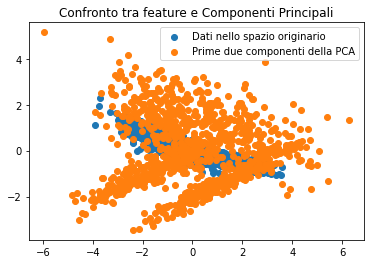

In [3]:
pca = PCA()
pca.fit(X)
CA = pca.transform(X)

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], label='Dati nello spazio originario')
ax.scatter(CA[:, 0], CA[:, 1], label='Prime due componenti della PCA')
ax.set_title('Confronto tra feature e Componenti Principali')
ax.legend()
plt.show()

Verifichiamo anche che le componenti principali non coincidono con i valori iniziali di `X` mediante il metodo [`array_equal`](https://numpy.org/doc/stable/reference/generated/numpy.array_equal.html).

In [4]:
np.array_equal(X[:, :20], CA)

False

Vediamo adesso la varianza spiegata dalle componenti estratte dalla PCA. Per farlo, usiamo l'attributo `explained_variance_ratio_` dell'oggetto `PCA`.

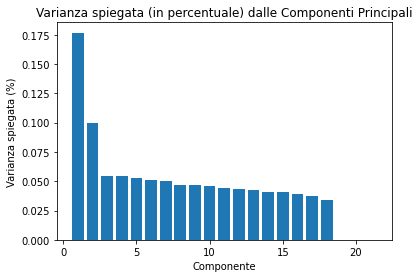

Componenti necessarie per spiegare il 70% della varianza: 12


In [5]:
fig, ax = plt.subplots()
ax.bar(np.arange(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
ax.set_xlabel('Componente')
ax.set_ylabel('Varianza spiegata (%)')
ax.set_title('Varianza spiegata (in percentuale) dalle Componenti Principali')
plt.show()

explained_variance = 0
counter = 1
while explained_variance < 0.7:
    explained_variance += pca.explained_variance_ratio_[counter - 1]
    counter += 1
print('Componenti necessarie per spiegare il 70% della varianza: {}'.format(counter))

In questo specifico caso, è necessario usare ben 12 componenti principali per spiegare il settanta per cento della varianza del problema originario. Nella maggior parte dei casi reali, tuttavia, questi valori sono raggiungibili usando al più le prime 3 - 4 componenti.

## Parte 3: Selezione delle feature

Concludiamo adesso verificando cosa accade a seguito di una procedura di feature selection. Per farlo, usiamo un oggetto di classe [`VarianceThreshold`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html#sklearn.feature_selection.VarianceThreshold), che ci permette di impostare un valore minimo di campioni che devono presentare una varianza non nulla affinché la feature non venga scartata.

In altre parole, se abbiamo delle feature per le quali una gran parte dei campioni assume lo stesso valore, queste non sono considerate nella stima, in quanto poco informative. Nel nostro caso, impostiamo il valore di soglia a 0.8 (ovvero, almeno l'ottanta per cento dei campioni non deve avere valori ripetuti).

In [6]:
vt = VarianceThreshold(threshold=(.8 * (1 - .8)))
vt.fit(X)
X_fs = vt.transform(X)

In [7]:
print('Numero di feature prima della selection: {} \nNumero di feature dopo la selection: {}'.format(X.shape[1], X_fs.shape[1]))

Numero di feature prima della selection: 21 
Numero di feature dopo la selection: 20


Verifichiamo infine che le prime venti feature di `X` (che sappiano essere non a bassa varianza) siano uguali ad `X_fs`.

In [8]:
np.array_equal(X[:, :20], X_fs)

True